#  Apparel Category Prediction

## Author: Spriha Ghosh

![ChessUrl](https://pahaldesign.com/wp-content/uploads/2021/03/girl-spinning-across.gif "chess")

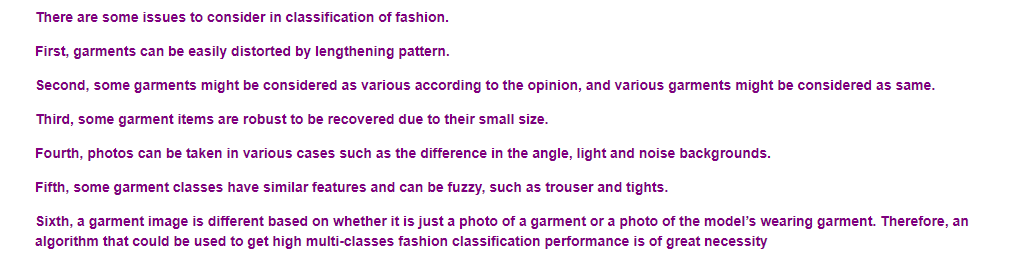

## Import Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,LeakyReLU,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['fashionmnist']


**To make data access easier, we generate images divided in directories by usage, and labels. This way, we are able, to easily obtain image information by using only its path** 

**To label this dataset, CNN models are done in Python with Keras and TensorFlow. Training is executed in a Jupyter notebook, using GPU. We also use Weights and Biases to grab information about training and hardware usage**


## Extract Dataset

In [14]:
df_train=pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
df_test=pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

## Feature Labelling

In [45]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
idx_category = {k: v for v, k in enumerate(labels)}

## Data Visualization

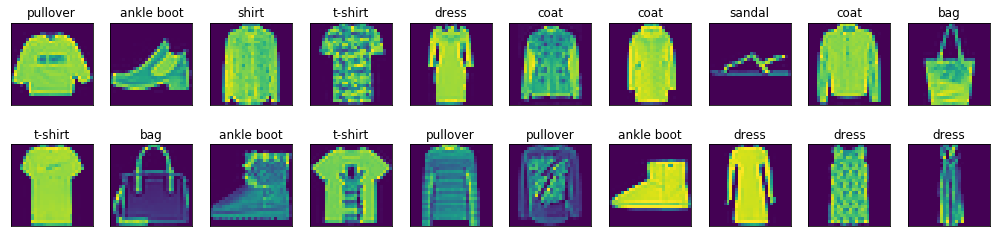

In [9]:
plt.figure(figsize=(14, 12))

for i in range(0,20):
    splt = plt.subplot(7, 10, i+1)
    plt.imshow(train.iloc[:, 1:].values[i].reshape(28, 28))
    plt.title("{}".format(categories[train.iloc[:, 0].values[i]]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

## Distribution of Labels

In [52]:
print('Train Set Class Distribution:\n')
print(df_train['label'].value_counts())

print('\nTest Set Class Distribution:\n')
print(df_test['label'].value_counts())

Train Set Class Distribution:

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

Test Set Class Distribution:

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64


## Split the Data Into Train and Test set

In [15]:
train=np.array(df_train,dtype="float32")
test=np.array(df_test,dtype="float32")

In [16]:
x_train=train[:,1:]
y_train=to_categorical(train[:,0])
x_test=test[:,1:]
y_test=to_categorical(test[:,0])

## Reshaping the Images

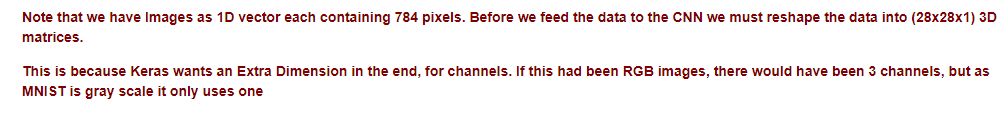

In [18]:
img_rows= 28
img_cols= 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
img_shape = (img_rows, img_cols, 1)

## Normalization 
**The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer. They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we acheive Zero Mean and Unit Variance.**

**Normalization is carried out as follows:**

**x = (x - min) / (max - min) ; Here min=0 and max=255**
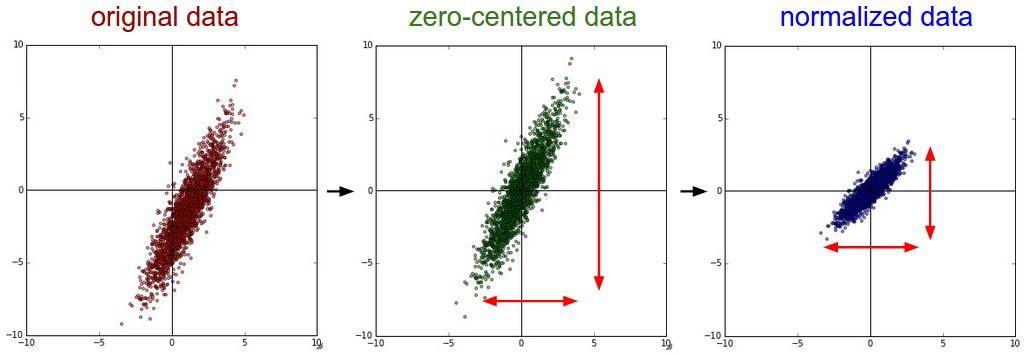

In [19]:
x_train=x_train/255
x_test=x_test/255

## Building A CNN Model

![ChessUrl](https://i.imgur.com/vshx52r.gif "chess")





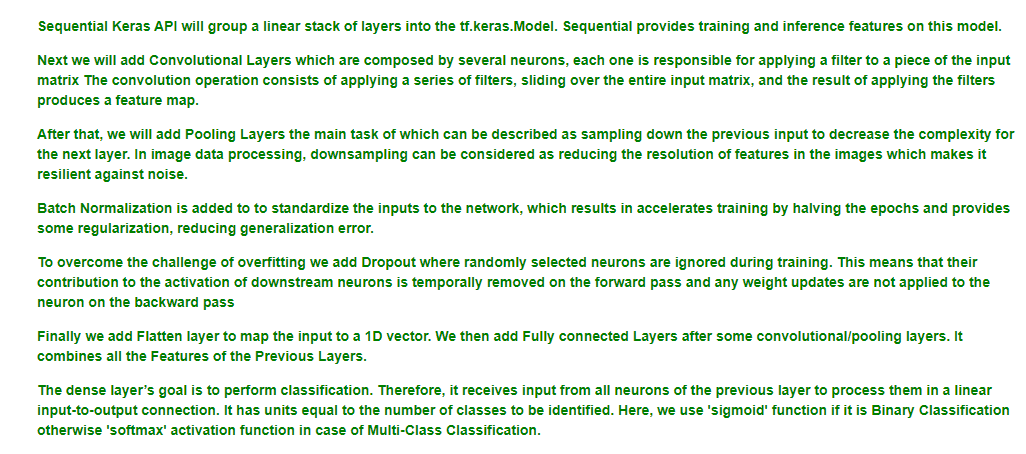

In [20]:
cnn_model = Sequential()

In [21]:
cnn_model.add(Conv2D(256, kernel_size=(3, 3),input_shape=img_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())
cnn_model.add(LeakyReLU(0.1))
cnn_model.add(Dropout(0.1))

cnn_model.add(Conv2D(128, (3, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.1))
cnn_model.add(LeakyReLU(0.1))

cnn_model.add(Flatten())
cnn_model.add(Dense(256))
cnn_model.add(LeakyReLU(0.1))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.1))
cnn_model.add(Dense(10, activation='softmax'))

In [22]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 13, 13, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 128)       512       
__________

## Compile the Model


In [23]:
cnn_model.compile(optimizer='adamax',loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the Model

In [24]:
information=cnn_model.fit(x_train, y_train, batch_size=25 ,epochs=20,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 356us/step - loss: 0.4491 - acc: 0.8408 - val_loss: 0.3979 - val_acc: 0.8520
Epoch 2/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.3279 - acc: 0.8819 - val_loss: 0.2962 - val_acc: 0.8907
Epoch 3/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.2838 - acc: 0.8959 - val_loss: 0.3074 - val_acc: 0.8808
Epoch 4/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.2531 - acc: 0.9067 - val_loss: 0.2568 - val_acc: 0.9055
Epoch 5/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.2315 - acc: 0.9162 - val_loss: 0.2241 - val_acc: 0.9187
Epoch 6/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.2078 - acc: 0.9236 - val_loss: 0.2295 - val_acc: 0.9166
Epoch 7/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.1924 - acc: 0.9291 - val_loss: 0.

<code>&nbsp;</code>

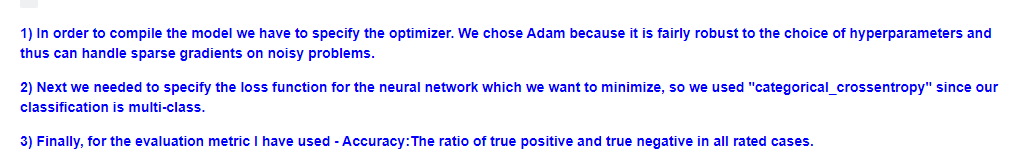


![alt](https://i.gifer.com/A5q5.gif )

<code>&nbsp;</code>


## Evaluate The Model

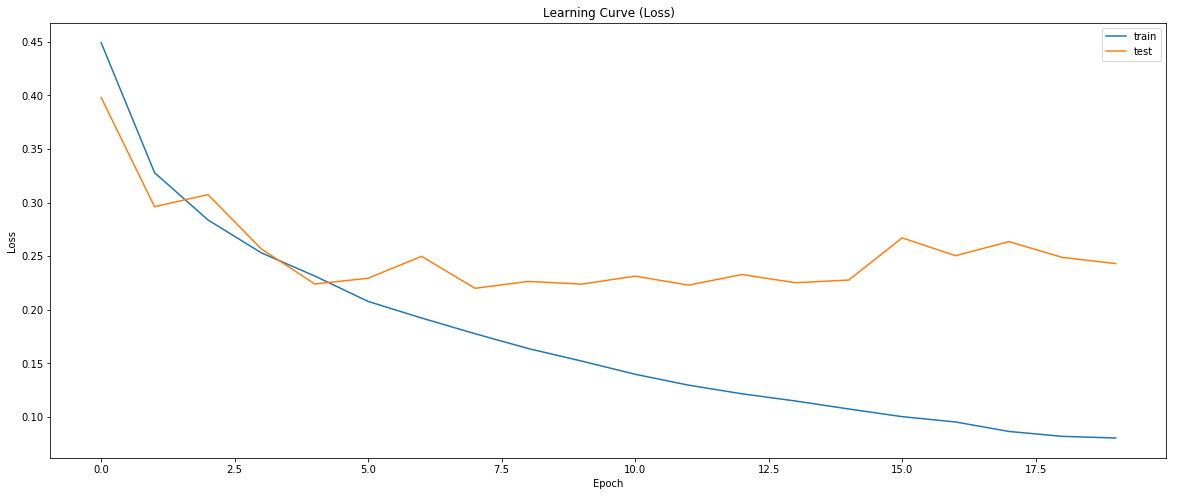

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = information.epoch, y = information.history['loss'])
sns.lineplot(x = information.epoch, y = information.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['train', 'test'], loc='best')
plt.show()


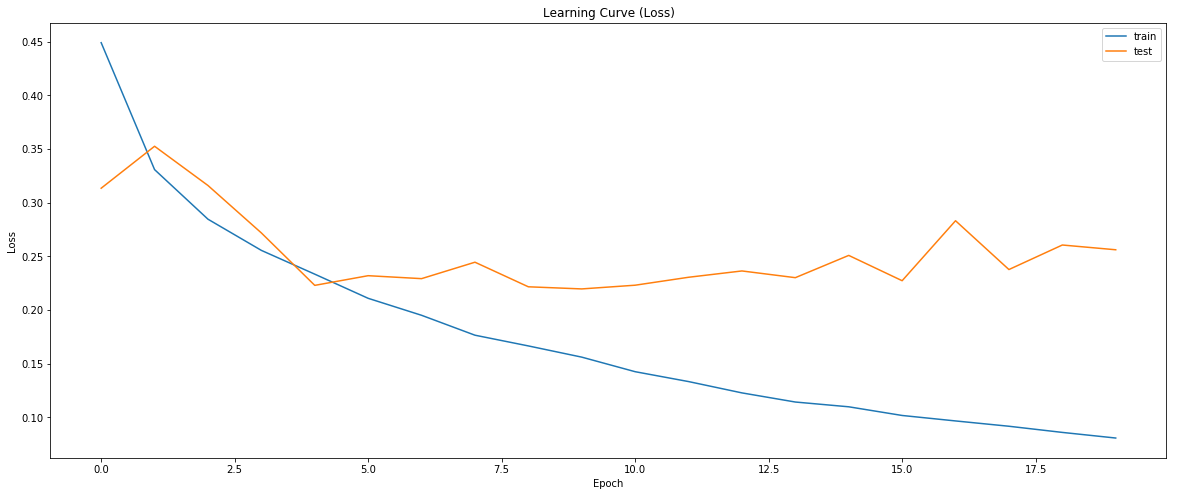

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = information.epoch, y = information.history['loss'])
sns.lineplot(x = information.epoch, y = information.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['train', 'test'], loc='best')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
predictions = cnn_model.predict(x_test)
pred_labels = predictions.argmax(axis=-1) #From probabilities to class labels
print("Test Accuracy: ", accuracy_score(df_test['label'], pred_labels))

Test Accuracy:  0.9275


In [33]:
evaluation = cnn_model.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

10000/10000 [==============================] - 1s 70us/step
Test Accuracy : 0.927


## The accuracy of our model is 92.7%

## Visualize the Predictions

### Correct Predictions

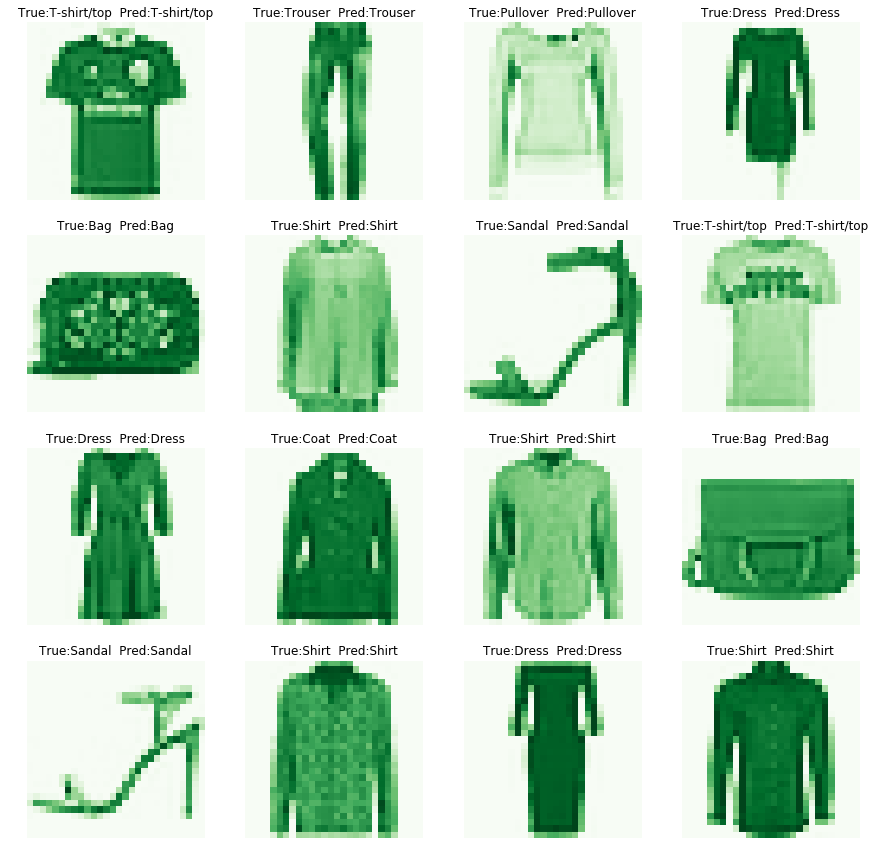

In [46]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(x_test[indx].reshape(img_rows,img_cols), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

## Incorrect Predictions

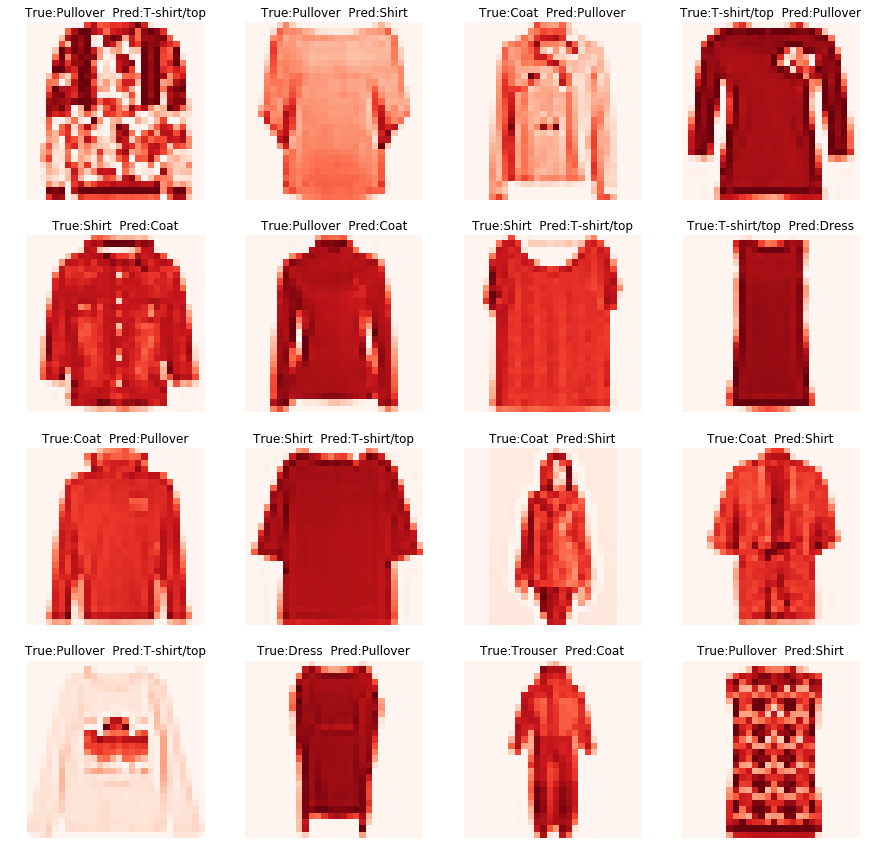

In [47]:
plot_images(incorrect, "Reds")

In [54]:
y_head=cnn_model.predict(x_test)
y_predict=np.argmax(y_head, axis=1)
y_true = np.argmax(y_test,axis=1)

## Confusion Matrix

**A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.**

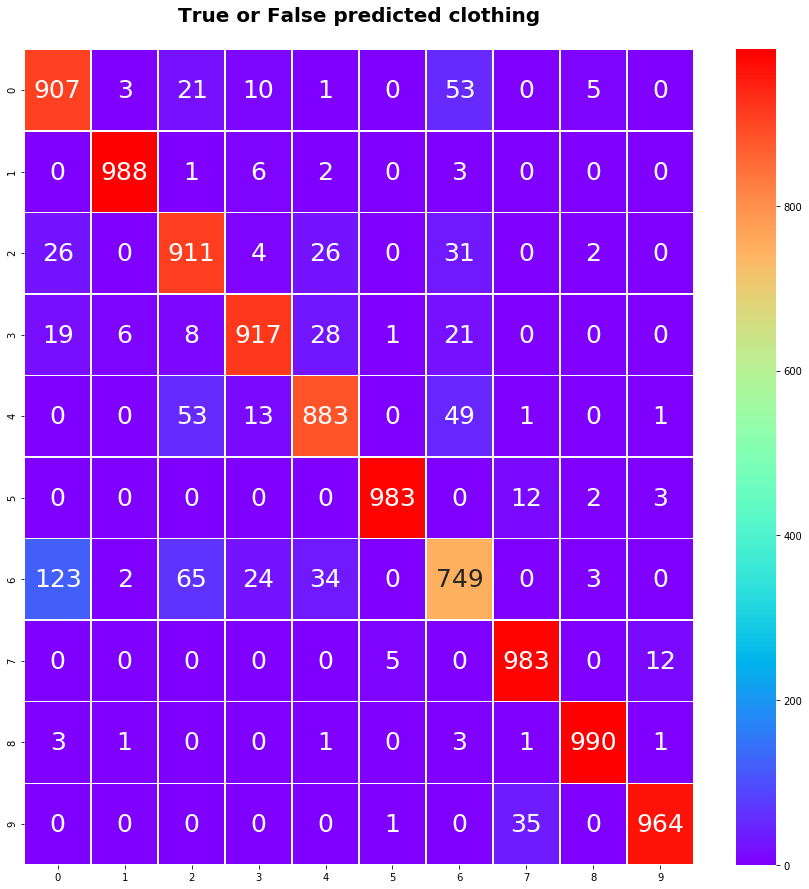

In [55]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_true,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(15,15))
sb.heatmap(con_mat,annot=True,annot_kws={'size': 25},linewidths=0.5,fmt="d",cmap="rainbow")
plt.title('True or False predicted clothing\n',fontweight='bold',fontsize=20)
plt.show()

# Key Insights and Conclusion

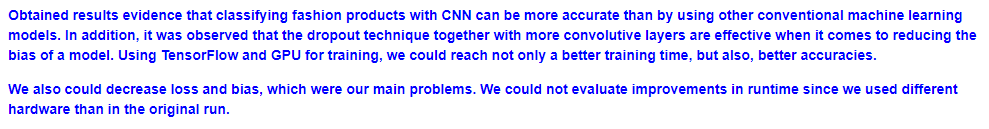